# Определение перспективного тарифа для телеком компании

## Введение

**Целью данного исследования** является определение тарифа в телеком компании, приносящего ей больше денег - для последующей корректировки рекламного бюджета. **Исследование построено** на данных 500 пользователей "Мегалайна" (федерального оператора сотовой связи) за 2018 год.

**Иследование состоит из следующих этапов**: 
1. [Обзор данных и их предобработка](#step_1):
    * [Импорт библиотек и выделение констант](#step_1.1);
    * [Общая информация о данных](#step_1.2);
    * [Замена типа данных](#step_1.3)
    * [Определение и исправление ошибок в данных](#step_1.4);
    * [Подготовка пользовательских данных](#step_1.5);
    * [Вывод](#step_1.6).
2. [Исследовательский и статистический анализ данных](#step_2):
    * [Описание поведения клиентов](#step_2.1);
    * [Расчёт статистических показателей модели](#step_2.2);
    * [Построение и анализ гистограмм](#step_2.3);
    * [Проверка статистических гипотез](#step_2.4);
    * [Вывод](#step_2.5).
3. [Общий вывод](#step_3);
4. [Рекомендации](#step_4).

В работе проведён анализ поведения клиентов. **Результатом исследования** являются рекомендации по корректировке рекламного бюджета телеком компании "Мегалайн".

## Этап 1. Обзор данных и их предобработка <a id='step_1'></a>

### Импорт библиотек и выделение констант <a id='step_1.1'></a>

#### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from IPython import display

import matplotlib.pyplot as plt
import seaborn as sns

import math as mt
from scipy import stats as st

#### Константы

В качестве констант в исследовании введём следующие параметры:

In [2]:
# Содержание Мегабайтов в 1 Гигабайте
GB_TO_MB = 1024

### Общая информация о данных <a id='step_1.2'></a>

#### Информация о тарифах

In [3]:
# Прочитаем файл tariffs.csv с информацией о тарифах и сохраним его в переменной tariffs
tariffs = pd.read_csv('C:/Users/Public/Jupyter/tariffs.csv')
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [4]:
# изучим общую информацию о датафрейме tariffs
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Всего в таблице 8 столбцов, тип данных у 1 столбца - < object >, у 7 столбцов - целочисленный.

Подробно разберём, какие в tariffs столбцы, и какую информацию они содержат:
- `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
- `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
- `rub_monthly_fee` — ежемесячная абонентская плата в рублях
- `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета
- `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
- `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета
- `tariff_name` — название тарифа

Количество значений в столбцах одинаково. Это говорит о том, что в данных нет пропущенных значений. Замена типа данных также не требуется.

Так, по данным таблицы, мы имеем следующее **описание тарифов "Смарт" и "Ультра"** <a id='tariffs_info'></a>, между которыми выбирает компания.

*Тариф "Смарт"*:
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей
    
*Тариф «Ультра»*:
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей

#### Информация о пользователях

In [5]:
# Прочитаем файл users.csv с информацией о пользователях и сохраним его в переменной users
users = pd.read_csv('C:/Users/Public/Jupyter/users.csv')
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [6]:
# изучим общую информацию о датафрейме users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Всего в таблице 8 столбцов, тип данных у 6 столбцов - < object >, а у 2 столбцов - целочисленный.

Подробно разберём, какие в users столбцы, и какую информацию они содержат:
- `user_id` — уникальный идентификатор пользователя
- `age` — возраст пользователя (годы)
- `churn_date` — дата прекращения пользования тарифом
- `city` — город проживания пользователя
- `first_name` — имя пользователя
- `last_name` — фамилия пользователя
- `reg_date` — дата подключения тарифа (день, месяц, год)
- `tariff` — название тарифного плана

Количество значений в столбцах различается. Это говорит о том, что в данных есть пропущенные значения: в столбце `churn_date`. Однако нам известно, что если значение в данном столбце пропущено, то тариф ещё действовал на момент выгрузки данных. Соответственно, таблица не нуждается в заполнении пропусков.

Требуется изменение типа данных в столбцах с датой (`churn_date` и `reg_date`) с < object > на < datetime >.

#### Информация о звонках

In [7]:
# Прочитаем файл calls.csv с информацией о звонках и сохраним его в переменной calls
calls = pd.read_csv('C:/Users/Public/Jupyter/calls.csv')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [8]:
# изучим общую информацию о датафрейме calls
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Всего в таблице 4 столбца, тип данных у 2 столбцов - < object >, у 1 столбца - целочисленный, и у 1 столбца - численный с плавающей точкой.

Подробно разберём, какие в calls столбцы, и какую информацию они содержат:
- `id` — уникальный номер звонка
- `call_date` — дата звонка
- `duration` — длительность звонка в минутах
- `user_id` — идентификатор пользователя, сделавшего звонок

Количество значений в столбцах одинаково. Это говорит о том, что в данных нет пропущенных значений. Однако при работе с датафреймом следует учитывать следующий момент: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

Соответственно, необходимо округление в столбце `duration` до минут в большую сторону и изменение типа данных до целочисленного. Также требуется изменение типа данных в столбце с датой `call_date`.

#### Информация о сообщениях

In [9]:
# Прочитаем файл messages.csv с информацией о сообщениях и сохраним его в переменной messages
messages = pd.read_csv('C:/Users/Public/Jupyter/messages.csv')
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
# изучим общую информацию о датафрейме messages
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Всего в таблице 3 столбца, тип данных у 2 столбцов - < object >, у 1 столбца - целочисленный.

Подробно разберём, какие в messages столбцы, и какую информацию они содержат:
- `id` — уникальный номер сообщения
- `message_date` — дата сообщения
- `user_id` — идентификатор пользователя, отправившего сообщение

Количество значений в столбцах одинаково. Это говорит о том, что в данных нет пропущенных значений. Требуется изменение типа данных в столбце с датой `message_date`.

#### Информация об интернет-сессиях

In [11]:
# Прочитаем файл internet.csv с информацией об интернет-сессиях и сохраним его в переменной internet
internet = pd.read_csv('C:/Users/Public/Jupyter/internet.csv', index_col=0)
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [12]:
# изучим общую информацию о датафрейме internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


Всего в таблице 4 столбца, тип данных у 2 столбцов - < object >, у 1 столбца - целочисленный, у 1 столбца - численный с плавающей точкой.

Подробно разберём, какие в internet столбцы, и какую информацию они содержат:
- `id` — уникальный номер сессии
- `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
- `session_date` — дата интернет-сессии
- `user_id` — идентификатор пользователя

Количество значений в столбцах одинаково. Это говорит о том, что в данных нет пропущенных значений.

Необходимо округление в столбце `mb_used` до мегабайт в большую сторону и изменение типа данных до целочисленного. Также требуется изменение типа данных в столбце с датой `session_date`.

### Замена типа данных <a id='step_1.3'></a>

Как было выявлено при изучении общей информации, требуется изменение типа данных в ряде столбцов с датой (с < object > на < datetime >):
- `reg_date` в таблице `users`; 
- `call_date` в таблице `calls`; 
- `message_date` в таблице `messages`; 
- `session_date` в таблице `internet`.

Также необходимо округление в большую сторону и изменение типа данных до целочисленного (с < float > на < int >):
- в столбце `duration` таблицы `calls`: до минут;
- в столбце `mb_used` таблицы `internet`: до мегабайт.

In [13]:
# Функция замены типа данных для столбцов с датой:
def to_date(df, column):
    df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')

In [14]:
# Заменяем тип данных для столбцов данных:
to_date(users, 'reg_date')
to_date(calls, 'call_date')
to_date(messages, 'message_date')
to_date(internet, 'session_date')

In [15]:
# Функция округления в большую сторону и изменения типа до целочисленного
def round_int(df, column):
    df[column] = df[column].apply(mt.ceil)
    df[column].astype(int)

In [16]:
# округление времени разговора
round_int(calls, 'duration')
# округление объёма интернет-трафика
round_int(internet, 'mb_used')

Проверим, что тип данных заменён везде, где это требовалось.

In [17]:
display.display(data=users.info())
print()
display.display(data=calls.info())
print()
display.display(data=messages.info())
print()
display.display(data=internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64     

### Определение и исправление ошибок в данных <a id='step_1.4'></a>

#### Данные о тарифах

In [18]:
tariffs.describe()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


In [19]:
print('Число строк-дубликатов равно {}.'.format(tariffs.duplicated().sum()))

Число строк-дубликатов равно 0.


В данных по тарифам нет пропущенных значений, нет дубликатов, среднее значение по столбцам совпадает с медианным. Ошибок в данных не выявлено.

У нас имеется 2 тарифа для анализа, информация о которых приведена в [соответствующем пункте](#tariffs_info).

#### Данные о пользователях

In [20]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [21]:
print('Число строк-дубликатов равно {}.'.format(users.duplicated().sum()))

Число строк-дубликатов равно 0.


In [22]:
users['reg_date'].sort_values().unique().min()

numpy.datetime64('2018-01-01T00:00:00.000000000')

In [23]:
users['reg_date'].sort_values().unique().max()

numpy.datetime64('2018-12-31T00:00:00.000000000')

In [24]:
users['churn_date'].sort_values().unique()

array(['2018-08-17', '2018-08-31', '2018-09-02', '2018-09-26',
       '2018-09-27', '2018-10-03', '2018-10-04', '2018-10-05',
       '2018-10-14', '2018-10-25', '2018-10-27', '2018-10-28',
       '2018-11-07', '2018-11-13', '2018-11-16', '2018-11-21',
       '2018-11-22', '2018-11-26', '2018-11-27', '2018-11-30',
       '2018-12-03', '2018-12-09', '2018-12-11', '2018-12-14',
       '2018-12-16', '2018-12-18', '2018-12-20', '2018-12-21',
       '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-26',
       '2018-12-30', nan], dtype=object)

In [25]:
len(users['city'].sort_values().unique())

76

В данных по пользователям среднее и медиана слабо отличаются, все данные имеют подходящий для анализа вид. Остальные данные, которые являются объектами также не нуждаются в обработке.

У нас имеется информация о 500 пользователях, возрастом от 18 до 75 лет (средний возраст составляет 46-47 лет), которые подключили тариф в период с 1 января по 31 декабря 2018 года, а перестали им пользоваться в период с 17 августа по 30 декабря 2018 года (в случае, если перестали пользоваться). Также известно, что пользователи проживают в 76 различных городах.

#### Данные о звонках

In [26]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,7.158198,1253.940619
std,5.959173,144.722751
min,0.000000,1000.000000
25%,2.000000,1126.000000
50%,6.000000,1260.000000
75%,11.000000,1379.000000
max,38.000000,1499.000000


In [27]:
print('Число строк-дубликатов равно {}.'.format(calls.duplicated().sum()))

Число строк-дубликатов равно 0.


In [28]:
calls.groupby('duration')['duration'].count().head()

duration
0    39613
1     8402
2     9194
3    10362
4    10918
Name: duration, dtype: int64

In [29]:
len(calls[calls['duration'] == 0]) / len(calls)

0.19551644316336553

В данных по звонкам нет пропущенных значений, нет дубликатов, среднее значение по столбцам близко к медианному. Однако есть значения с длительностью звонков 0 минут. Причём таких данных около 20% от всей выборки. C одной стороны, это значительная величина. С другой стороны, можно было бы предложить, что это могут быть пропущенные звонки: звонок был зафиксирован, но время разговора составило 0 минут. Однако таблица содержит данные о принятых звонках, поэтому данный вариант может быть спорным.

Построим график, иллюстрирующий динамику количества клиентов по длительности звонков (нулевые/ненулевые/все звонки).

In [30]:
# "Нулевые" звонки
zero_calls = (calls
                  .query('duration == 0')
                  .pivot_table(index='call_date', values='id', aggfunc='count')
                  .reset_index()
                  .sort_values(by='call_date', ascending=False)
             )
# "Ненулевые" звонки
other_calls = (calls
                  .query('duration != 0')
                  .pivot_table(index='call_date', values='id', aggfunc='count')
                  .reset_index()
                  .sort_values(by='call_date', ascending=False)
             )
# Все звонки
all_calls = (calls
                  .pivot_table(index='call_date', values='id', aggfunc='count')
                  .reset_index()
                  .sort_values(by='call_date', ascending=False)
              )

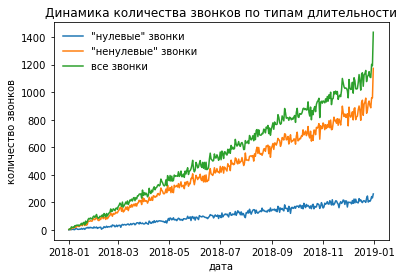

In [31]:
fig, ax = plt.subplots()
ax.set(title='Динамика количества звонков по типам длительности',
       xlabel='дата', ylabel='количество звонков')
ax.plot(zero_calls['call_date'], zero_calls['id'], label='"нулевые" звонки')
ax.plot(other_calls['call_date'], other_calls['id'], label='"ненулевые" звонки')
ax.plot(all_calls['call_date'], all_calls['id'], label='все звонки')
ax.grid=True
ax.legend(frameon=False)
plt.show()

Наблюдаем следующую тенденцию: с ростом количества сделанных звонков, растёт и количество "нулевых" звонков, но более медленными темпами. Соответственно, "нулевые" звонки есть у каждого пользователя и в каждом месяце 2018 года. Такие звонки могут быть связаны с отменёнными вызовами (пользователь "произвёл действие" со звонком, но разговора не было), с переадресованными вызовами (по данному номеру разговора не было, хотя звонок поступил), с пропущенными звонками (звонок был, но разговора не было).

Такого плана звонки нет смысла оставлять для нашего исследования, поскольку они не тратят лимита времени в рамках абонентской платы, и не требуют дополнительных затрат с потребителя. Мы можем удалить значения.

In [32]:
calls.drop(calls.loc[calls['duration'] == 0].index, inplace=True)

#### Данные о сообщениях

In [33]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [34]:
print('Число строк-дубликатов равно {}.'.format(messages.duplicated().sum()))

Число строк-дубликатов равно 0.


In [35]:
messages['message_date'].sort_values().unique().min()

numpy.datetime64('2018-01-02T00:00:00.000000000')

In [36]:
messages['message_date'].sort_values().unique().max()

numpy.datetime64('2018-12-31T00:00:00.000000000')

В данных по сообщениям среднее и медиана слабо отличаются, все данные имеют подходящий для анализа вид. Остальные данные, которые являются объектами также не нуждаются в обработке. Ошибок не выявлено.

Информация о сообщениях представлена за период с 2 января по 31 декабря 2018 года.

#### Данные об интернет-сессиях

In [37]:
internet.describe()

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.622098,1252.099842
std,278.387019,144.050823
min,0.000000,1000.000000
25%,139.000000,1130.000000
50%,349.000000,1251.000000
75%,560.000000,1380.000000
max,1725.000000,1499.000000


In [38]:
print('Число строк-дубликатов равно {}.'.format(internet.duplicated().sum()))

Число строк-дубликатов равно 0.


In [39]:
internet.groupby('mb_used')['mb_used'].count().head()

mb_used
0    19598
1      102
2       98
3       96
4      100
Name: mb_used, dtype: int64

In [40]:
len(internet[internet['mb_used'] == 0]) / len(internet)

0.13118155773916304

В данных по интернет-сессиям нет пропущенных значений, нет дубликатов, среднее значение по столбцам близко к медианному. Однако есть значения с потраченным интернет-трафиком в размере 0 мегабайт. Причём таких данных около 13% от всей выборки. Это значительная величина. Проведём анализ, аналогичный анализу длительности звонков.

In [41]:
# "Нулевые" интернетт-соединения
zero_internet = (internet
                  .query('mb_used == 0')
                  .pivot_table(index='session_date', values='id', aggfunc='count')
                  .reset_index()
                  .sort_values(by='session_date', ascending=False)
             )
# "Ненулевые" интернет-соединения
other_internet = (internet
                  .query('mb_used != 0')
                  .pivot_table(index='session_date', values='id', aggfunc='count')
                  .reset_index()
                  .sort_values(by='session_date', ascending=False)
             )
# Все интернет-соединения
all_internet = (internet
                  .pivot_table(index='session_date', values='id', aggfunc='count')
                  .reset_index()
                  .sort_values(by='session_date', ascending=False)
              )

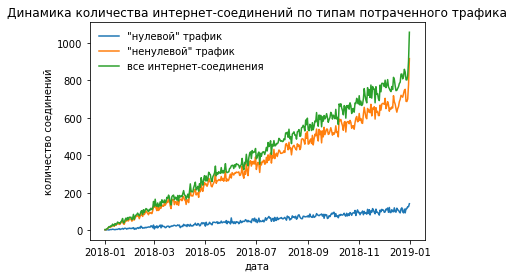

In [42]:
fig, ax = plt.subplots()
ax.set(title='Динамика количества интернет-соединений по типам потраченного трафика',
       xlabel='дата', ylabel='количество соединений')
ax.plot(zero_internet['session_date'], zero_internet['id'], label='"нулевой" трафик')
ax.plot(other_internet['session_date'], other_internet['id'], label='"ненулевой" трафик')
ax.plot(all_internet['session_date'], all_internet['id'], label='все интернет-соединения')
ax.grid=True
ax.legend(frameon=False)
plt.show()

Наблюдаем ту же тенденцию, что и для длительности разговоров: "нулевые" интернет-соединения есть у каждого пользователя и в каждом месяце 2018 года. Такие соединенияя могут быть связаны с отсутствием мобильного интернета в момент соединения (пользователь пытался подключиться, но интернет "не ловился" устройством), сбоями в сети (устройство переподключалось к интернету), блокировкой интернета при отрицательном балансе (если такая опция есть у данного оператора).

Такого плана интернет-соединения также нет смысла оставлять для нашего исследования, так как они не затрачивают лимит трафика в рамках абонентской платы, и не требуют дополнительных затрат с потребителя. Мы можем удалить значения.

In [43]:
internet.drop(internet.loc[internet['mb_used'] == 0].index, inplace=True)

### Подготовка пользовательских данных <a id='step_1.5'></a>

#### Количество звонков и минут разговора по месяцам

Соберём информацию по каждому пользователю о количестве сделанных звонков и израсходованных минутах разговора. Информация нужна по месяцам. Для того, чтобы вывести информацию по месяцам, добавим в таблицу `calls` столбец `call_month`, определяющий месяц, в который сделан звонок.

In [44]:
calls['call_month'] = pd.DatetimeIndex(calls['call_date']).month

Создадим сводную таблицу, в которой будет представлена интересующая нас информация.

In [45]:
user_calls = pd.pivot_table(calls,
                            index=['user_id', 'call_month'],
                            values=['duration'],
                            aggfunc=('sum', 'count')).reset_index()
user_calls.columns = ['user_id', 'month', 'call_numbers', 'call_duration']

In [46]:
# TOP10 пользователей по количеству сделанных звонков
user_calls.sort_values(by='call_numbers', ascending=False).head(10).reset_index(drop=True)

,user_id,month,call_numbers,call_duration
0,1467,12,190,1673
1,1377,3,165,1609
2,1216,12,162,1435
3,1222,10,157,1322
4,1196,6,149,1410
5,1377,10,148,1401
6,1222,9,148,1261
7,1377,12,147,1259
8,1078,12,146,1273
9,1222,12,146,1261


In [47]:
# TOP10 пользователей по количеству израсходованных минут разговора
user_calls.sort_values(by='call_duration', ascending=False).head(10).reset_index(drop=True)

,user_id,month,call_numbers,call_duration
0,1467,12,190,1673
1,1377,3,165,1609
2,1216,12,162,1435
3,1196,6,149,1410
4,1377,10,148,1401
5,1474,12,132,1345
6,1168,10,145,1334
7,1222,10,157,1322
8,1341,8,146,1321
9,1377,7,144,1311


В TOP10 пользователей по количеству сделанных звонков и израсходованных минут разговора наблюдаются одни и те же пользователи, хотя есть и те, кто лидирует в одном списке, но отсутствует в лидерах другого списка.

#### Количество сообщений по месяцам

Соберём информацию по каждому пользователю о количестве отправленных сообщений. Информация также нужна по месяцам. Для того, чтобы вывести информацию по месяцам, добавим в таблицу messages столбец message_month, определяющий месяц, в который отправлено сообщение.

In [48]:
messages['message_month'] = pd.DatetimeIndex(messages['message_date']).month

Создадим сводную таблицу, в которой будет представлена интересующая нас информация.

In [49]:
user_messages = pd.pivot_table(messages,
                               index=['user_id', 'message_month'],
                               values=['id'],
                               aggfunc=('count')).reset_index()
user_messages.columns = ['user_id', 'month', 'message_numbers']

In [50]:
# TOP10 пользователей по количеству отправленных сообщений
user_messages.sort_values(by='message_numbers', ascending=False).head(10).reset_index(drop=True)

,user_id,month,message_numbers
0,1165,12,224
1,1028,10,223
2,1231,7,211
3,1231,6,201
4,1165,11,197
5,1300,10,191
6,1231,12,191
7,1167,10,190
8,1231,9,188
9,1231,10,185


При беглом взгляде на TOP10 пользователей по количеству отправленных сообщений видим, что пользователи, занимающие лидирующие позиции по звонкам, не занимают лидирующие позиции по сообщениям.

Можем сделать предварительное предположение о том, что существуют пользователи с разными предпочтениями (и, соответственно, разным спросом): для одних интереснее и важнее звонки, для других - сообщения.

Рассмотрим ситуацию с интернетом.

#### Объём интернет-трафика по месяцам

Соберём информацию по каждому пользователю об объёме использованного интернет-трафика. Информация нужна по месяцам. Для того, чтобы вывести информацию по месяцам, добавим в таблицу internet столбец internet_month, определяющий месяц, в который осуществлялась интернет-сессия.

Кроме того, переведём используемые Мегабайты в Гигабайты, воспользовавшись введённой в начале исследования константой GB_TO_MB.

In [51]:
# Информация об интернет-сессиях по месяцам
internet['internet_month'] = pd.DatetimeIndex(internet['session_date']).month

# Перевод использованного интернет-трафика из мегабайт в гигабайты
internet['gb_used'] = internet['mb_used'] / GB_TO_MB

Создадим сводную таблицу, в которой будет представлена интересующая нас информация (данные об объёме использованного интернет-трафика приведены в гигабайтах).

In [52]:
user_internet = pd.pivot_table(internet,
                               index=['user_id', 'internet_month'],
                               values=['gb_used'],
                               aggfunc=('sum')).reset_index()
user_internet.columns = ['user_id', 'month', 'gb_used']

In [53]:
# TOP10 пользователей по объёму использованного интернет-трафика
user_internet.sort_values(by='gb_used', ascending=False).head(10).reset_index(drop=True)

,user_id,month,gb_used
0,1124,10,48.622070
1,1240,8,47.260742
2,1255,7,44.162109
3,1300,11,43.301758
4,1060,12,42.942383
5,1240,5,42.845703
6,1180,10,42.589844
7,1240,12,42.347656
8,1380,12,42.329102
9,1024,11,42.134766


В TOP10 пользователей по объёму использованного интернет-трафика встречаются единицы пользователей из предыдущих списков лидеров. Однако, в большей степени список представлен другими пользователями. Это подтверждает нашу предварительную гипотезу о том, что отдельным пользователям интересна какая-то одна опция пакета, и менее интересны другие опции.

#### Выручка с каждого пользователя

Для расчёта помесячной выручки с каждого пользователя нам следует сделать следующее:

- рассчитать звонки, сообщения и интернет-трафик сверх лимита пакета тарифа;
- рассчитать стоимость сверхлимитных опций;
- рассчитать суммарные затраты потребителя, включающие сумму абонентской платы и оплаты за сверхлимит.

##### Cоздание таблицы с информацией об использовании тарифов пользователями

Создадим новую таблицу: в ней мы объединим данные о количестве звонков и минут разговора, данные о количестве сообщений, данные об Объёме интернет-трафика по месяцам.

In [54]:
user_total = user_calls.merge(user_messages, on=['user_id', 'month'], how='outer')
user_total = user_total.merge(user_internet, on=['user_id', 'month'], how='outer')
user_total

,user_id,month,call_numbers,call_duration,message_numbers,gb_used
0,1000,5,17.0,159.0,22.0,2.203125
1,1000,6,28.0,172.0,60.0,22.711914
2,1000,7,41.0,340.0,75.0,13.687500
3,1000,8,42.0,408.0,81.0,13.740234
4,1000,9,46.0,466.0,57.0,14.239258
...,...,...,...,...,...,...
3209,1489,10,NaN,NaN,21.0,19.128906
3210,1489,11,NaN,NaN,20.0,17.105469
3211,1489,12,NaN,NaN,35.0,16.934570
3212,1240,2,NaN,NaN,NaN,0.938477


У нас появились пустые значения в разных столбцах. Это связано с разной длинной исходных таблиц по звонкам, сообщениям и интернету. Скорее всего, если информации о пользователе не было, он никогда не пользовался данной услугой внутри пакета. Поэтому мы можем поставить нули, вместо пропущенных значений.

In [55]:
user_total = user_total.fillna(0)
user_total

,user_id,month,call_numbers,call_duration,message_numbers,gb_used
0,1000,5,17.0,159.0,22.0,2.203125
1,1000,6,28.0,172.0,60.0,22.711914
2,1000,7,41.0,340.0,75.0,13.687500
3,1000,8,42.0,408.0,81.0,13.740234
4,1000,9,46.0,466.0,57.0,14.239258
...,...,...,...,...,...,...
3209,1489,10,0.0,0.0,21.0,19.128906
3210,1489,11,0.0,0.0,20.0,17.105469
3211,1489,12,0.0,0.0,35.0,16.934570
3212,1240,2,0.0,0.0,0.0,0.938477


Добавим информацию о тарифе и характеристиках тарифа, к которому подключен каждый пользователь.

In [56]:
user_total = user_total.merge(users, on='user_id', how='outer')
user_total.drop(['age', 'first_name', 'last_name'], axis='columns', inplace=True)
user_total

,user_id,month,call_numbers,call_duration,message_numbers,gb_used,churn_date,city,reg_date,tariff
0,1000,5.0,17.0,159.0,22.0,2.203125,NaN,Краснодар,2018-05-25,ultra
1,1000,6.0,28.0,172.0,60.0,22.711914,NaN,Краснодар,2018-05-25,ultra
2,1000,7.0,41.0,340.0,75.0,13.687500,NaN,Краснодар,2018-05-25,ultra
3,1000,8.0,42.0,408.0,81.0,13.740234,NaN,Краснодар,2018-05-25,ultra
4,1000,9.0,46.0,466.0,57.0,14.239258,NaN,Краснодар,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...
3211,1489,10.0,0.0,0.0,21.0,19.128906,NaN,Санкт-Петербург,2018-08-15,smart
3212,1489,11.0,0.0,0.0,20.0,17.105469,NaN,Санкт-Петербург,2018-08-15,smart
3213,1489,12.0,0.0,0.0,35.0,16.934570,NaN,Санкт-Петербург,2018-08-15,smart
3214,1128,NaN,NaN,NaN,NaN,NaN,2018-12-23,Волжский,2018-12-15,ultra


Обнаружились пользователи, которые подключены к тарифам, но не пользовались услугами, и отключились от тарифов через несколько дней после подключения. В рамках анализа они не нужны, мы можем их удалить.

In [57]:
user_total.dropna(subset = ['call_numbers'], inplace = True)

Также нам следует проверить соответствие тарифа данным. Таблица с данными о пользователях включает информацию о названии тарифа на день выгрузки. Однако возможны ситуации, когда звонки, сообщения и интернет-сессии производились до даты подключения к тарифу, либо после даты отключения от него. Такие ситуации либо следует исключить из анализа - если, к примеру, мы значем, что в это время пользователь был клиентом "Мегалайна", но находился на каком-то третьем тарифе, условия которого в рамках данного исследования нам неизвестны. Либо мы предполагаем, что клиент был подключен к другому из указанных двух тарифов "Мегалайна", а значит необходимо учитывать параметры другого тарифа, а не известного на момент выгрузки.

Поскольку изначально у нас имеется информация о том, что компания "Мегалайн" предлагает клиентам только два тарифа: "Смарт" и "Ультра", воспользуемся вторым вариантом и преобразуем таблицу с данными.

Создадим столбцы, в которых выведем месяц подключения тарифа и месяц прекращения пользования тарифом, соответственно.

In [58]:
user_total['churn_month'] = pd.DatetimeIndex(user_total['churn_date']).month
user_total['reg_month'] = pd.DatetimeIndex(user_total['reg_date']).month
user_total.drop(['churn_date', 'reg_date'], axis='columns', inplace=True)

Проверим, что у нас есть строки, подходящие под условия: месяц, в который произведены действия (сделан звонок, отправлено сообщение, проведена интернет-сессия) потребителем раньше, чем месяц подключения, либо позже, чем месяц отключения.

In [59]:
len(user_total.loc[(user_total['month'] < user_total['reg_month']) | 
                   (user_total['month'] > user_total['churn_month'])])

0

Таких строк нет, а значит тариф соответствует тем месяцам, в которых были проведены операции. Изменение данного столбца не требуется, как мы предположили ранее.

Удалим лишние столбцы и приведём данные в нужный вид после всех преобразований.

In [60]:
user_total.drop(['churn_month', 'reg_month'], axis='columns', inplace=True)
round_int(user_total, 'month')
round_int(user_total, 'call_numbers')
round_int(user_total, 'call_duration')
round_int(user_total, 'message_numbers')
round_int(user_total, 'gb_used')
user_total

,user_id,month,call_numbers,call_duration,message_numbers,gb_used,city,tariff
0,1000,5,17,159,22,3,Краснодар,ultra
1,1000,6,28,172,60,23,Краснодар,ultra
2,1000,7,41,340,75,14,Краснодар,ultra
3,1000,8,42,408,81,14,Краснодар,ultra
4,1000,9,46,466,57,15,Краснодар,ultra
...,...,...,...,...,...,...,...,...
3209,1489,8,0,0,17,11,Санкт-Петербург,smart
3210,1489,9,0,0,32,17,Санкт-Петербург,smart
3211,1489,10,0,0,21,20,Санкт-Петербург,smart
3212,1489,11,0,0,20,18,Санкт-Петербург,smart


Прежде чем мы добавим в нашу таблицу об использовании тарифов пользователями информацию о характеристиках тарифа, необходимо обработать таблицу с характеристиками. Переведём ограничения по использованию трафика из мегабайтов в гигабайты, как мы это уже делали для другой таблицы. А также переименуем столбец с названием тарифа, чтобы было возможно использовать метод 'merge'.

In [61]:
# Перевод объёма интернет-трафика, включённого в абонентскую плату, из мегабайт в гигабайты
tariffs['gb_per_month_included'] = tariffs['mb_per_month_included'] / GB_TO_MB

# Переименование столбца tariff_name
tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb',
                   'rub_per_message', 'rub_per_minute', 'tariff', 'gb_per_month_included']

In [62]:
user_total = user_total.merge(tariffs, on='tariff', how='left')
user_total.drop(['mb_per_month_included'], axis='columns', inplace=True)
user_total

,user_id,month,call_numbers,call_duration,message_numbers,gb_used,city,tariff,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,5,17,159,22,3,Краснодар,ultra,1000,3000,1950,150,1,1,30.0
1,1000,6,28,172,60,23,Краснодар,ultra,1000,3000,1950,150,1,1,30.0
2,1000,7,41,340,75,14,Краснодар,ultra,1000,3000,1950,150,1,1,30.0
3,1000,8,42,408,81,14,Краснодар,ultra,1000,3000,1950,150,1,1,30.0
4,1000,9,46,466,57,15,Краснодар,ultra,1000,3000,1950,150,1,1,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0,0,17,11,Санкт-Петербург,smart,50,500,550,200,3,3,15.0
3210,1489,9,0,0,32,17,Санкт-Петербург,smart,50,500,550,200,3,3,15.0
3211,1489,10,0,0,21,20,Санкт-Петербург,smart,50,500,550,200,3,3,15.0
3212,1489,11,0,0,20,18,Санкт-Петербург,smart,50,500,550,200,3,3,15.0


Получили полную таблицу с информацией об использовании тарифов пользователями, также включающую информацию о лимитах и стоимости смертлимита в рамках тарифов.

Далее произведём расчёт необходимых для определения выручки показателей.

##### Расчёт звонков, сообщений и интернет-трафика сверх лимита пакета тарифа

У нас в таблице имеется информация об использовании тарифа пользователем, а также о лимитах использования. Будем добавлять столбцы со значениями сверхлимитного использования.

In [63]:
# Количество минут разговора сверх лимита
user_total['extra_minutes'] = user_total['call_duration'] - user_total['minutes_included']
user_total.loc[user_total['extra_minutes'] < 0, 'extra_minutes'] = 0

# Количество отправленных сообщений сверх лимита
user_total['extra_messages'] = user_total['message_numbers'] - user_total['messages_included']
user_total.loc[user_total['extra_messages'] < 0, 'extra_messages'] = 0

# Объём использованного трафика сверх лимита
user_total['extra_gb'] = user_total['gb_used'] - user_total['gb_per_month_included']
user_total.loc[user_total['extra_gb'] < 0, 'extra_gb'] = 0

##### Расчёт стоимости сверхлимитных опций

Для расчёта сверхлимитных опций умножим их стоимость на сверхлимитные объёмы использования каждой из опций, и просуммируем их.

In [64]:
user_total['extra_payment'] = (user_total['extra_minutes'] * user_total['rub_per_minute'] +
                               user_total['extra_messages'] * user_total['rub_per_message'] +
                               user_total['extra_gb'] * user_total['rub_per_gb'])

#### Расчёт суммарных затрат потребителя

Просуммируем столбцы с абонентской платой и с итоговой стоимостью сверлимитных опций.

In [65]:
user_total['monthly_total'] = (user_total['rub_monthly_fee'] + user_total['extra_payment']).astype(int)
revenue = user_total.pivot_table(index=['user_id', 'month'], values='monthly_total', aggfunc='sum').reset_index()

Удалим лишние столбцы с информацией о характеристике тарифов и обработаем значения в итоговой таблице.

In [66]:
user_total.drop(['messages_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 
                 'rub_per_minute', 'gb_per_month_included'], axis='columns', inplace=True)
round_int(user_total, 'extra_gb')
round_int(user_total, 'extra_payment')

In [67]:
# TOP10 пользователей, приносящих высокую выручку компании
revenue.sort_values(by='monthly_total', ascending=False).head(10).reset_index(drop=True)

,user_id,month,monthly_total
0,1486,12,6770
1,1042,12,5709
2,1486,11,5680
3,1261,12,5672
4,1286,12,5321
5,1159,12,5252
6,1098,12,5014
7,1124,10,4800
8,1261,11,4664
9,1240,8,4650


In [68]:
print('Суммарная выручка компании "Мегалайн" за 2018 год составила {} рублей.'.format(revenue['monthly_total'].sum()))

Суммарная выручка компании "Мегалайн" за 2018 год составила 4925751 рублей.


### Вывод <a id='step_1.6'></a>

У нас имеется 5 таблиц с данными для анализа:
- Информация о тарифах: содержит в себе основные параметры тарифов (стоимость; возможности, входящие в пакет; стоимость использования возможностей сверх тарифных пакетов.
- Информация о пользователях: содержит данные о возрасте пользователей; фамилии и имени; городе проживания; названии тарифного плана; начале и окончании пользования тарифом.
- Информация о звонках: дате и длительности звонка; идентификаторе пользователя.
- Информация о сообщениях: дате сообщения; идентификаторе пользователя.
- Информация об интернет-сессиях: дате интернет-сессии; объёме потраченного трафика; идентификаторе пользователя.

В процессе подготовки данных для анализа был заменён тип данных для столбцов с датами, а также для целочисленных значений. Кроме того, в большую сторону были округлены данные с использованным трафиком и количеством минут разговора.

Значительных ошибок в данных выявлено не было. Был обнаружен ошибочный столбец в одной из таблиц, который дублировал номера строк - он был удалён. Кроме того, были обнаружены нулевые значения в данных по количеству минут разговора и количеству использованных мегабайт. С одной стороны, это можно расценивать как ошибку. Однако 0 - это тоже информация о том, что данная опция тарифа не настолько интересна потребителю, как другие опции. Соответственно, было принято решение оставить такие значения в данных.

Также были подготовлены пользовательские данные: собрана информация о совершённых звонках и минутах разговора; количестве сообщений; объёме использованного интернет-трафика. Предварительный просмотр таких данных показал, что пользователи, как правило, отдают предпочтение только одной из опций тарифа: либо звонкам, либо сообщениям, либо интернету. Лидеры по использованию одного из направлений не являются лидерами по другим направлениям. После чего была рассчитана ежемесячная выручка компании, приходящаяя от каждого из пользователей. Были выявлены лидеры: максимальная величина, которую компания получила с пользователя за месяц в 2018 году (за декабрь) составила 6 770 рублей. Общая выручка составила 4,9 млн. рублей.

## Этап 2. Исследовательский и статистический анализ данных <a id='step_2'></a>

### Описание поведения клиентов <a id='step_2.1'></a>

Из получившейся таблицы со сводными данными по использованию клиентами тарифов сформируем таблицу, необходимую для анализа.

In [69]:
final_total = user_total[['user_id', 'month', 'call_duration', 'message_numbers', 'gb_used', 'city', 'tariff', 'monthly_total']]
final_total.head()

,user_id,month,call_duration,message_numbers,gb_used,city,tariff,monthly_total
0,1000,5,159,22,3,Краснодар,ultra,1950
1,1000,6,172,60,23,Краснодар,ultra,1950
2,1000,7,340,75,14,Краснодар,ultra,1950
3,1000,8,408,81,14,Краснодар,ultra,1950
4,1000,9,466,57,15,Краснодар,ultra,1950


In [70]:
smart_total = final_total.query('tariff == "smart"')
smart_total.head()

,user_id,month,call_duration,message_numbers,gb_used,city,tariff,monthly_total
8,1001,11,430,0,19,Москва,smart,1350
9,1001,12,414,0,14,Москва,smart,550
10,1002,6,117,4,11,Стерлитамак,smart,550
11,1002,7,214,11,18,Стерлитамак,smart,1150
12,1002,8,289,13,20,Стерлитамак,smart,1550


In [71]:
smart_total.describe()

,user_id,month,call_duration,message_numbers,gb_used,monthly_total
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,1246.506505,8.346792,417.934948,33.384029,16.359354,1294.639300
std,146.119496,2.920316,190.313730,28.227876,5.758498,820.933202
min,1001.000000,1.000000,0.000000,0.000000,0.000000,550.000000
25%,1121.000000,6.000000,282.000000,10.000000,13.000000,550.000000
50%,1239.000000,9.000000,422.000000,28.000000,17.000000,1038.000000
75%,1376.000000,11.000000,545.000000,51.000000,20.000000,1750.000000
max,1499.000000,12.000000,1435.000000,143.000000,38.000000,6770.000000


Для тарифа "Смарт" ежемесячная длительность разговоров изменялась с января по декабрь 2018 года в пределах от 0 минут до 1 435 минут (45-50 минут в день) с медианным значением 422 минуты (около 14 минут в день); количество используемого интернет-трафика колебалось от 0Гб до 38гб с медианным значением 17Гб; количество отправленных сообщений - с 0 до 143 сообщений с медианным значением 28 сообщений.

In [72]:
ultra_total = final_total.query('tariff == "ultra"')
ultra_total.head()

,user_id,month,call_duration,message_numbers,gb_used,city,tariff,monthly_total
0,1000,5,159,22,3,Краснодар,ultra,1950
1,1000,6,172,60,23,Краснодар,ultra,1950
2,1000,7,340,75,14,Краснодар,ultra,1950
3,1000,8,408,81,14,Краснодар,ultra,1950
4,1000,9,466,57,15,Краснодар,ultra,1950


In [73]:
ultra_total.describe()

,user_id,month,call_duration,message_numbers,gb_used,monthly_total
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,1263.094416,8.250761,526.623350,49.363452,19.525888,2071.065990
std,140.694908,2.871762,317.606098,47.804457,9.865848,378.802377
min,1000.000000,1.000000,0.000000,0.000000,0.000000,1950.000000
25%,1143.000000,6.000000,284.000000,6.000000,12.000000,1950.000000
50%,1277.000000,9.000000,518.000000,38.000000,19.000000,1950.000000
75%,1381.000000,11.000000,752.000000,79.000000,27.000000,1950.000000
max,1495.000000,12.000000,1673.000000,224.000000,49.000000,4800.000000


Для тарифа "Ультра" ежемесячная длительность разговоров с января по декабрь 2018 года колебалась в диапазоне от 0 минут до 1 673 минут (65-66 минут в день) с медианным значением 518 минут (около 17 минут в день); количество используемого интернет-трафика - от 0Гб до 49Гб с медианным значением 19Гб; количество отправленных сообщений - с 0 до 224 сообщений с медианным значением 38 сообщений.

In [74]:
smart_pivot = smart_total.pivot_table(index='month',
                                      values=['call_duration', 'message_numbers', 'gb_used', 'monthly_total'],
                                      aggfunc='mean').reset_index()
ultra_pivot = ultra_total.pivot_table(index='month',
                                      values=['call_duration', 'message_numbers', 'gb_used', 'monthly_total'],
                                      aggfunc='mean').reset_index()

In [75]:
# Функция для построения сравнительных графиков
def compare_plot(title, ylabel, column):
    fig, ax = plt.subplots()
    ax.set(title=title+' тарифов Смарт и Ультра за 2018 год',
           xlabel='месяц',
           ylabel=ylabel)
    ax.plot(smart_pivot['month'], smart_pivot[column], 'o-', label='Smart')
    ax.plot(ultra_pivot['month'], ultra_pivot[column], 'o-', label='Ultra')
    ax.grid=True
    ax.legend(frameon=False)
    plt.show()

Сравним ежемесячное среднее значение для пользователей по количеству минут разговора в рамках анализируемых тарифов.

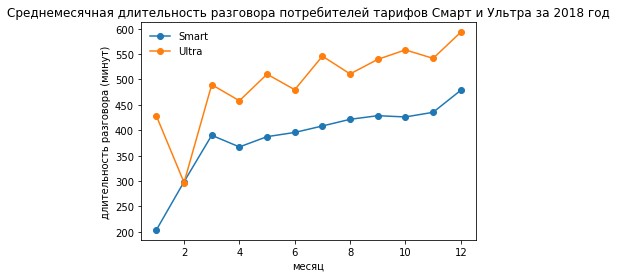

In [76]:
compare_plot('Среднемесячная длительность разговора потребителей',
             'длительность разговора (минут)',
             'call_duration')

Наблюдаем следующие тенденции. С января по декабрь для обоих тарифов наблюдался рост длительности разговора потребителей для обоих тарифов. Кроме того, в каждом из месяцев длительность разговора потребителей на тарифе "Ультра" превышала аналогичный показатель на тарифе "Смарт". Исключение составляет только февраль. Но это значение по тарифу "Смарт" сильно выбивается - с ним явно какие-то проблемы (проблемы с исходными данными).

Сравним ежемесячное среднее значение для пользователей по количеству сообщений в рамках анализируемых тарифов.

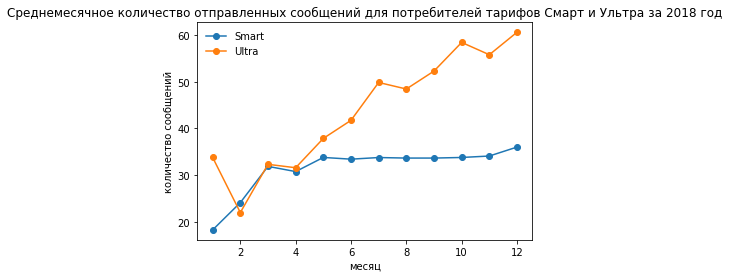

In [77]:
compare_plot('Среднемесячное количество отправленных сообщений для потребителей',
             'количество сообщений',
             'message_numbers')

Наблюдаем следующие тенденции. С января по декабрь для обоих тарифов наблюдался рост количества отправляемых сообщений у потребителей для обоих тарифов. Причём для тарифа "Ультра" он более явный. Для тарифа "Смарт" характерно увеличение до апреля-мая, а далее значение колебалось возле установившегося среднего уровня. Если сравнивать тарифы между собой, в феврале количество сообщений на тарифе "Смарт" превышало показатель тарифа "Ультра", в марте-апреле они были практически равны, затем ситуация изменилась: покзатель тарифа "Смарт" прекратил рост на установившейся отметке, а показатель по тарифу "Ультра" продолжил расти и превзошёл тариф "Смарт".

Сравним ежемесячный средний объём интернет-трафика, потребляемый пользователями, в рамках анализируемых тарифов.

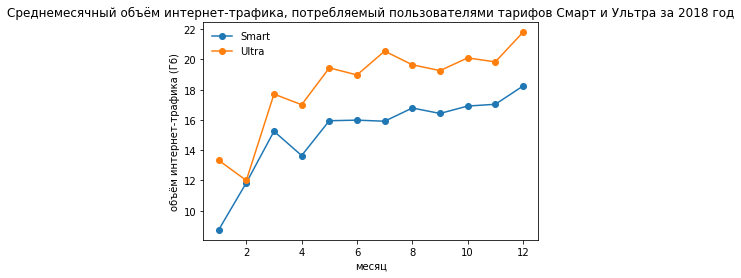

In [78]:
compare_plot('Среднемесячный объём интернет-трафика, потребляемый пользователями',
             'объём интернет-трафика (Гб)',
             'gb_used')

Для интернет-трафика наблюдаются те же тенденции, что и для длительности звонков. И снова наблюдаются странные выбивающиеся значения для февраля по тарифу "Ультра".

Сравним ежемесячную выручку от пользователей различных тарифов.

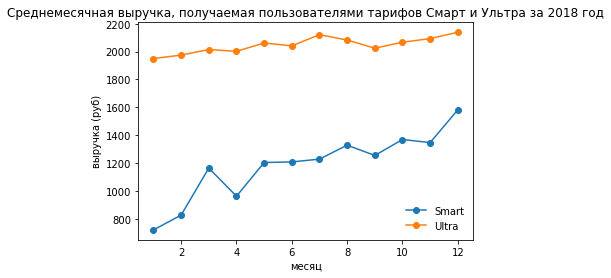

In [79]:
compare_plot('Среднемесячная выручка, получаемая пользователями',
             'выручка (руб)',
             'monthly_total')

Получили незначительно колеблющееся значение выручки для тарифа "Ультра" на уровне около 2 000 рублей; и растущее значение для тарифа "Смарт" с небольшим падением в апреле. Однако значения по тарифу "Ультра" в несколько раз превосходит значения для тарифа "Смарт". Это связано с очень большим значением абонентской платы для тарифа "Ультра" с очень большими лимитами, в которые "укладывается" за месяц значительное число клиентов.

### Расчёт статистических показателей модели <a id='step_2.2'></a>

Рассчитаем для каждого из тарифов статистические показатели: среднее значение, дисперсию и стандартное отклонение.

In [80]:
# Средние значения для тарифа "Смарт"
smart_mean = smart_total.mean()
smart_mean

user_id            1246.506505
month                 8.346792
call_duration       417.934948
message_numbers      33.384029
gb_used              16.359354
monthly_total      1294.639300
dtype: float64

In [81]:
# Дисперсия для тарифа "Смарт"
smart_variation = np.var(smart_total, ddof=1)
smart_variation

user_id             21350.907161
month                   8.528245
call_duration       36219.315784
message_numbers       796.812958
gb_used                33.160304
monthly_total      673931.321363
dtype: float64

In [82]:
# Стандартное отклонение для тарифа "Смарт"
smart_std_dev = np.std(smart_total, ddof=1)
smart_std_dev

user_id            146.119496
month                2.920316
call_duration      190.313730
message_numbers     28.227876
gb_used              5.758498
monthly_total      820.933202
dtype: float64

Расчитаем промежуток, в котором находится 99% значений по правилу трёх сигм в тарифе "Смарт".

In [83]:
# Длительность звонка
smart_call_dur_min = max(0, smart_mean['call_duration'] - 3 * smart_std_dev['call_duration'])
smart_call_dur_max = smart_mean['call_duration'] + 3 * smart_std_dev['call_duration']
print('Длительность звонков для пользователей тарифа "Смарт" лежит в промежутке от {:.0f} до {:.0f} минут.'
      .format(smart_call_dur_min, smart_call_dur_max))

# Объём интернет-трафика
smart_gb_used_min = max(0, smart_mean['gb_used'] - 3 * smart_std_dev['gb_used'])
smart_gb_used_max = smart_mean['gb_used'] + 3 * smart_std_dev['gb_used']
print('Объём использованного интернет-трафика для пользователей тарифа "Смарт" лежит в промежутке от {:.0f} до {:.0f} \
      Гигабайт.'.format(smart_gb_used_min, smart_gb_used_max))

# Количество сообщений
smart_message_num_min = max(0, smart_mean['message_numbers'] - 3 * smart_std_dev['message_numbers'])
smart_message_num_max = smart_mean['message_numbers'] + 3 * smart_std_dev['message_numbers']
print('Количество отправленных сообщений для пользователей тарифа "Смарт" лежит в промежутке от {:.0f} до {:.0f} сообщений.'
      .format(smart_message_num_min, smart_message_num_max))

Длительность звонков для пользователей тарифа "Смарт" лежит в промежутке от 0 до 989 минут.
Объём использованного интернет-трафика для пользователей тарифа "Смарт" лежит в промежутке от 0 до 34       Гигабайт.
Количество отправленных сообщений для пользователей тарифа "Смарт" лежит в промежутке от 0 до 118 сообщений.


In [84]:
# Средние значения для тарифа "Ультра"
ultra_mean = ultra_total.mean()
ultra_mean

user_id            1263.094416
month                 8.250761
call_duration       526.623350
message_numbers      49.363452
gb_used              19.525888
monthly_total      2071.065990
dtype: float64

In [85]:
# Дисперсия для тарифа "Ультра"
ultra_variation = np.var(ultra_total, ddof=1)
ultra_variation

user_id             19795.057133
month                   8.247014
call_duration      100873.633397
message_numbers      2285.266143
gb_used                97.334949
monthly_total      143491.240560
dtype: float64

In [86]:
# Стандартное отклонение для тарифа "Ультра"
ultra_std_dev = np.std(ultra_total, ddof=1)
ultra_std_dev

user_id            140.694908
month                2.871762
call_duration      317.606098
message_numbers     47.804457
gb_used              9.865848
monthly_total      378.802377
dtype: float64

Расчитаем промежуток, в котором находится 99% значений по правилу трёх сигм в тарифе "Ультра".

In [87]:
# Длительность звонка
ultra_call_dur_min = max(0, ultra_mean['call_duration'] - 3 * ultra_std_dev['call_duration'])
ultra_call_dur_max = ultra_mean['call_duration'] + 3 * ultra_std_dev['call_duration']
print('Длительность звонков для пользователей тарифа "Ультра" лежит в промежутке от {:.0f} до {:.0f} минут.'
      .format(ultra_call_dur_min, ultra_call_dur_max))

# Объём интернет-трафика
ultra_gb_used_min = max(0, ultra_mean['gb_used'] - 3 * ultra_std_dev['gb_used'])
ultra_gb_used_max = ultra_mean['gb_used'] + 3 * ultra_std_dev['gb_used']
print('Объём использованного интернет-трафика для пользователей тарифа "Ультра" лежит в промежутке от {:.0f} до {:.0f} \
      Гигабайт.'.format(ultra_gb_used_min, ultra_gb_used_max))

# Количество сообщений
ultra_message_num_min = max(0, (ultra_mean['message_numbers'] - 3 * ultra_std_dev['message_numbers']))
ultra_message_num_max = ultra_mean['message_numbers'] + 3 * ultra_std_dev['message_numbers']
print('Количество отправленных сообщений для пользователей тарифа "Ультра" лежит в промежутке от {:.0f} до {:.0f} сообщений.'
      .format(ultra_message_num_min, ultra_message_num_max))

Длительность звонков для пользователей тарифа "Ультра" лежит в промежутке от 0 до 1479 минут.
Объём использованного интернет-трафика для пользователей тарифа "Ультра" лежит в промежутке от 0 до 49       Гигабайт.
Количество отправленных сообщений для пользователей тарифа "Ультра" лежит в промежутке от 0 до 193 сообщений.


Большинство значений длительности звонков для тарифа "Смарт" составило от 0 до 989 минут; а для тарифа "Ультра" - от 0 до 1479 минут. Большинство значений объёма использования интернет-трафика для тарифа "Смарт" составило от 0 до 34 гигабайт; а для тарифа "Ультра" - от 0 до 49 гигабайт. Это очень близкие значения. Большинство значений количества отправленных сообщений для тарифа "Смарт" составило от 0 до 118 сообщений; а для тарифа "Ультра" - от 0 до 193 сообщений. Построим гистограммы.

Для наглядности соберём полученные значения в общую таблицу.

In [88]:
stat_values = pd.DataFrame({'stat_value': ['CALLS_minimum_minutes', 'CALLS_mean_minutes', 'CALLS_maximum_minutes',
                                           'CALLS_variation', 'CALLS_std_deviation', 'INTERNET_minimum_gb',
                                           'INTERNET_mean_gb', 'INTERNET_maximum_gb', 'INTERNET_variation',
                                           'INTERNET_std_deviation', 'MESSAGES_minimum', 'MESSAGES_mean',
                                           'MESSAGES_maximum', 'MESSAGES_variation', 'MESSAGES_std_deviation'],
                            'Smart': [smart_call_dur_min, smart_mean['call_duration'], smart_call_dur_max,
                                      smart_variation['call_duration'], smart_std_dev['call_duration'],
                                      smart_gb_used_min, smart_mean['gb_used'], smart_gb_used_max,
                                      smart_variation['gb_used'], smart_std_dev['gb_used'],
                                      smart_message_num_min, smart_mean['message_numbers'], smart_message_num_max,
                                      smart_variation['message_numbers'], smart_std_dev['message_numbers']],
                            'Ultra': [ultra_call_dur_min, ultra_mean['call_duration'], ultra_call_dur_max,
                                      ultra_variation['call_duration'], ultra_std_dev['call_duration'],
                                      ultra_gb_used_min, ultra_mean['gb_used'], ultra_gb_used_max,
                                      ultra_variation['gb_used'], ultra_std_dev['gb_used'],
                                      ultra_message_num_min, ultra_mean['message_numbers'], ultra_message_num_max,
                                      ultra_variation['message_numbers'], ultra_std_dev['message_numbers']]})
stat_values[['Smart', 'Ultra']] = round(stat_values[['Smart', 'Ultra']],0).astype('int')
stat_values = stat_values.set_index('stat_value')
stat_values

,Smart,Ultra
stat_value,,
CALLS_minimum_minutes,0,0
CALLS_mean_minutes,418,527
CALLS_maximum_minutes,989,1479
CALLS_variation,36219,100874
CALLS_std_deviation,190,318
INTERNET_minimum_gb,0,0
INTERNET_mean_gb,16,20
INTERNET_maximum_gb,34,49
INTERNET_variation,33,97


### Построение и анализ гистограмм <a id='step_2.3'></a>

Поскольку данные по тарифам "Смарт" и "Ультра" являются непрерывными и имеют разную размерность, а выбор для них разного количества корзин при построении гистограммы может повлиять на результат, воспользуемся для анализа гистограммами плотности.

In [89]:
# Функция для построения сравнительных гистограмм
def kdeplot(xlabel, text, column):
    plt.xlabel(xlabel)
    plt.ylabel('плотность распределения')
    plt.title('Сопоставление распределения '+text+' по тарифам')
    sns.kdeplot(smart_total[column], shade=True, label="Smart")
    sns.kdeplot(ultra_total[column], shade=True, label="Ultra")
    plt.show()

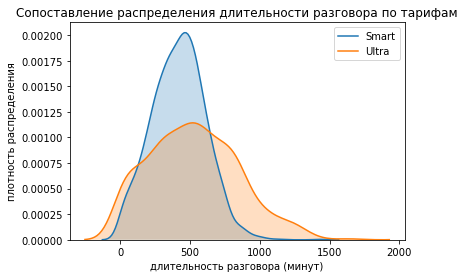

In [90]:
# Длительность разговора
kdeplot('длительность разговора (минут)', 'длительности разговора', 'call_duration')

Распределения в разрезе тарифов по длительности разговора близки к нормальным, причём в тарифе "Ультра" больше интервал, в котором находятся основные значения. Распределение длительности разговора по тарифу "Смарт" не имеет явных скосов. А распределение длительности разговора по тарифу "Ультра" немного скошено вправо, то есть медианное значение ниже среднего. Это говорит нам о том, что в тарифе "Ультра" присутствуют люди, которые использует тарифные минуты разговора свыше медианного значения.

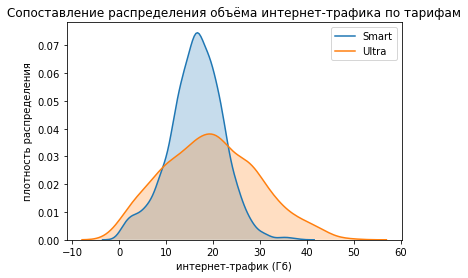

In [91]:
# Интернет-трафик
kdeplot('интернет-трафик (Гб)', 'объёма интернет-трафика', 'gb_used')

Распределения объёма используемого интернет-трафика по тарифам "Смарт" и "Ультра" близки к нормальным и имеют практически идентичный вид. Оба датасета скошены влево. Таким образом, в тарифах есть люди, которые используют интернет-трафик меньше медианного значения.

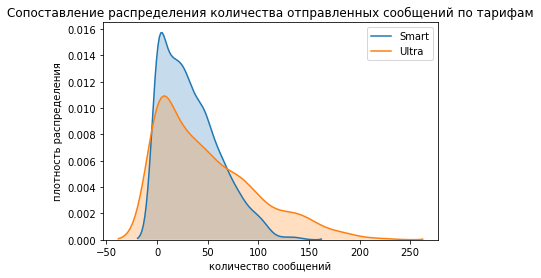

In [92]:
# Количество сообщений
kdeplot('количество сообщений', 'количества отправленных сообщений', 'message_numbers')

Распределения количества отправленных сообщений по тарифам "Смарт" и "Ультра" близки к нормальным, но тариф "Ультра" имеет чуть больший разброс значений, чем тариф "Смарт". Датасеты по обоим тарифам скошены вправо, то есть медианное значение ниже среднего значения. Это говорит о том, что в обоих тарифах присутствуют люди, которые используют функцию сообщений больше медианного значения (в тарифе "Ультра" показатель выше, чем в тарифе "Смарт").

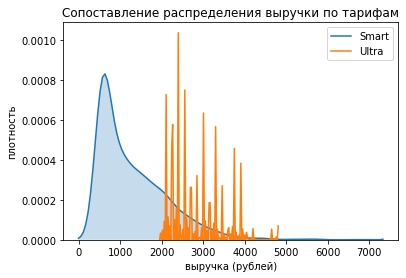

In [93]:
# Длительность разговора
plt.xlabel("выручка (рублей)")
plt.ylabel("плотность")
plt.title("Сопоставление распределения выручки по тарифам")
sns.kdeplot(smart_total['monthly_total'], shade=True, label="Smart")
sns.kdeplot(ultra_total['monthly_total'], shade=True, label="Ultra", bw=1.5)
plt.show()

Распределение выручки по тарифу "Смарт" близко к нормальному, но датасет скошен вправо, то есть существует большое количество пользователей тарифа, которые приносят компании выручку выше медианного значения.

Распределение выручки по тарифу "Ультра" выглядит иначе: пользователи приносят более высокую выручку компании, но у распределения очень много "выбросов": это говорит о том, что такая выручка не является постоянной и гарантированной: всё зависит от индивидуальных потребностей пользователя.

### Проверка статистических гипотез <a id='step_2.4'></a>

#### Гипотеза о различии средней выручки пользователей тарифов «Ультра» и «Смарт»

Мы будем анализировать две генеральные совокупности: выручки пользователей тарифов "Ультра" (`ultra_pivot`) и "Смарт" (`smart_pivot`).

Сформулируем нулевую гипотезу H0: Средние двух генеральных совокупностей равны между собой.

Альтернативная гипотеза H1: Средние двух генераальных совокупностей не равны между собой.

Несмотря на то, что `ultra_pivot` и `smart_pivot` - это не совсем генеральные совокупности, а скорее, выборки; но согласно центральной предельной теореме, выборочные средние распределены нормально вокруг истинного среднего генеральной совокупности. Введём уровень значимости, определяющий близость к среднему значению: 5%.

Кроме того, дисперсия каждой выборки должна быть оценена по датасету каждой из выборок, а не по их объединению. Также отметим, что выборки являются независимыми.

Проверим гипотезы через распределение t-Стьюдента.

In [94]:
sample_1 = ultra_total['monthly_total']
sample_2 = smart_total['monthly_total']

alpha = .05

results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 2.7240946993530856e-246
Отвергаем нулевую гипотезу.


Получили результат: p-значение оказалось меньше уровня значимости в 5%. Соответственно, мы отвергли нулевую гипотезу; приняли альтернативную гипотезу: средние двух генеральных совокупностей не равны между собой.

Вывод: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

#### Гипотеза о различии средней выручки пользователей из Москвы от выручки пользователей из других регионов

Создадим выборки для пользователей из Москвы: `users_Moscow`, и других регионов: `users_other`.

In [95]:
users_Moscow = final_total.query('city == "Москва"')
users_other = final_total.query('city != "Москва"')

Механизм схож с проверкой гипотезы о равенстве средней выручки для разных тарифов. Нам необходимо проанализировать две генеральные совокупности: выручки пользователей из Москвы (`users_Moscow`) и пользователей из других регионов (`users_other`).

Сформулируем нулевую гипотезу H0: Средние двух генеральных совокупностей равны между собой.

Альтернативная гипотеза H1: Средние двух генераальных совокупностей не равны между собой.

`users_Moscow` и `users_other` - это выборки из генеральных совокупностей. Для них также действует центральная предельная теорема: выборочные средние распределены нормально вокруг истинного среднего генеральной совокупности. Введём уровень значимости, определяющий близость к среднему значению: 5%.

Кроме того, дисперсия каждой выборки должна быть оценена по отдельности по значениям в ней самой. Также отметим, что выборки являются независимыми.

Проверим гипотезы через распределение t-Стьюдента.

In [96]:
sample_1 = users_Moscow['monthly_total']
sample_2 = users_other['monthly_total']

alpha = .05

results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 0.5126564657748214
Не получилось отвергнуть нулевую гипотезу.


Получили результат: p-значение оказалось больше уровня значимости в 5%. Соответственно, мы не можем отвергнуть нулевую гипотезу и принять альтернативную гипотезу.

Вывод: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

### Вывод <a id='step_2.5'></a>

Для тарифа "Смарт" ежемесячная длительность разговоров изменялась с января по декабрь 2018 года в пределах от 0 минут до 1435 минут (45-50 минут в день) с медианным значением 422 минуты (около 14 минут в день); количество используемого интернет-трафика колебалось от 0Гб до 38гб с медианным значением 17Гб; количество отправленных сообщений - с 0 до 143 сообщений с медианным значением 28 сообщений. Для тарифа "Ультра" ежемесячная длительность разговоров с января по декабрь 2018 года колебалась в диапазоне от 0 минут до 1673 минут (65-66 минут в день) с медианным значением 518 минут (около 17 минут в день); количество используемого интернет-трафика - от 0Гб до 49Гб с медианным значением 19Гб; количество отправленных сообщений - с 0 до 224 сообщений с медианным значением 38 сообщений. При этом значения февраля тарифа "Ультра" выбиваются из общих тенденций. Возможно, часть данных была утерена, либо в феврале были какие-то технические проблемы.

При сравнении тарифов было выявлено, что с января по декабрь для обоих тарифов наблюдался рост и длительности разговора, и количества сообщений, и интернет-трафика. При этом длительность разговора и интернет-трафика потребителей на тарифе "Ультра" превышала аналогичный показатель на тарифе "Смарт". Сообщения характеризуются несколько иной тенденцией: в феврале количество сообщений на тарифе "Смарт" превышало показатель тарифа "Ультра", в марте-апреле они были практически равны, затем ситуация изменилась. Покзатель тарифа "Смарт" прекратил рост на установившейся отметке, а показатель по тарифу "Ультра" продолжил расти и превзошёл тариф "Смарт".

Большинство значений длительности звонков для тарифа "Смарт" составило от 0 до 989 минут; а для тарифа "Ультра" - от 0 до 1479 минут. Большинство значений объёма использования интернет-трафика для тарифа "Смарт" составило от 0 до 34 гигабайт; а для тарифа "Ультра" - от 0 до 49 гигабайт. Это очень близкие значения. Большинство значений количества отправленных сообщений для тарифа "Смарт" составило от 0 до 118 сообщений; а для тарифа "Ультра" - от 0 до 193 сообщений.

Распределения в разрезе тарифов по всем параметрам (длительности разговоров, количеству сообщений, интернет-трафику) близки к нормальным. По объёму интернет трафика распределения по обоим тарифам имеют идентичный вид (но для тарифа "Ультра" данные расположены в более высоком интервале значений) со скошенностью влево. По количеству минут разговора в тарифе "Ультра" интервал шире, чем в тарифе "Смарт", и имеет скошенность вправо. А по количеству сообщений оба датасета скошены вправо. Это говорит нам о том, что в тарифе "Ультра" присутствуют люди, которые использует тарифные минуты разговора и отправляют сообщения свыше медианных значений; и те, кто использует интернет-трафик ниже медианного значения. В тарифе "Смарт" есть те, кто использует интернет-трафик ниже медианы; и люди, которые отправляют сообщения, свыше медианы.

Для выручки в разрезе тарифов получили незначительно колеблющееся значение для тарифа "Ультра" на уровне около 2 000 рублей; и растущее значение для тарифа "Смарт" с небольшим падением в апреле. Однако значения по тарифу "Ультра" в несколько раз превосходит значения для тарифа "Смарт". Это связано с очень большим значением абонентской платы для тарифа "Ультра" с очень большими лимитами, в которые "укладывается" за месяц значительное число клиентов.

Распределение выручки по тарифу "Смарт" близко к нормальному, но датасет скошен вправо, то есть существует большое количество пользователей тарифа, которые приносят компании выручку выше медианного значения. Распределение выручки по тарифу "Ультра" выглядит иначе. Пользователи приносят более высокую выручку компании, но у распределения очень много "выбросов": это говорит о том, что такая выручка не является постоянной и гарантированной - всё зависит от индивидуальных потребностей пользователя.

Были проведены t-тесты проверки двусторонних гипотез для двух независимых выборок. В результате данных тестов было выявлено, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается; а средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

## Общий вывод <a id='step_3'></a>

Было проведено исследование тарифов "Смарт" и "Ультра", которые предлагает компания «Мегалайн» — федеральный оператор сотовой связи. Анализ был проведён на основе имеющихся исходных **данных: о тарифах, о пользователях, о звонках, о сообщениях, об интернет-сессиях**. Была проведена предобработка данных (изменение типа, исправление ошибок, расчёт дополнительных показателей). Значительных ошибок в данных выявлено не было. Также были подготовлены пользовательские данные: собрана информация о совершённых звонках и минутах разговора; количестве сообщений; объёме использованного интернет-трафика. 

Предварительный просмотр таких данных показал, что **пользователи, как правило, отдают предпочтение только одной из опций тарифа: либо звонкам, либо сообщениям, либо интернету**. Лидеры по использованию одного из направлений не являются лидерами по другим направлениям. После чего была рассчитана ежемесячная выручка компании, приходящая от каждого из пользователей. Были выявлены лидеры: **максимальная величина, которую компания получила с пользователя за месяц в 2018 году (за декабрь) составила 6 770 рублей. Общая выручка составила 4,9 млн. рублей**.

При сравнении тарифов было выявлено, что **с января по декабрь для обоих тарифов наблюдался рост и длительности разговора, и количества сообщений, и интернет-трафика**. При этом длительность разговора и интернет-трафика потребителей на тарифе "Ультра" превышала аналогичный показатель на тарифе "Смарт". Сообщения характеризуются несколько иной тенденцией: в феврале количество сообщений на тарифе "Смарт" превышало показатель тарифа "Ультра", в марте-апреле они были практически равны, затем ситуация изменилась. Покзатель тарифа "Смарт" прекратил рост на установившейся отметке, а показатель по тарифу "Ультра" продолжил расти и превзошёл тариф "Смарт".

Большинство значений **длительности звонков для тарифа "Смарт" составило от 0 до 989 мину**т; а **для тарифа "Ультра" - от 0 до 1 479 минут**. Для тарифа "Смарт" этот разброс "заходит" за лимит в 500 минут; а для тарифа "Ультра" значение очень далеко от лимитных 3 000 минут. Распределения в разрезе тарифов по длительности разговора близки к нормальным, причём в тарифе "Ультра" больше интервал, в котором находятся основные значения. Распределение длительности разговора по тарифу "Смарт" не имеет явных скосов, а распределение длительности разговора по тарифу "Ультра" немного скошено вправо. Это говорит о том, что в тарифе "Ультра" присутствуют люди, которые использует тарифные минуты разговора свыше медианного значения.

Большинство значений **объёма использования интернет-трафика для тарифа "Смарт" составило от 0 до 34 гигабайт**; а **для тарифа "Ультра" - от 0 до 49 гигабайт**. При том, что лимитом для тарифа "Смарт" является 15 гигабайт, соответственно, многие пользователи вынуждены платить сверх абонентской платы; а для тарифа "Ультра" лимит установлен на уровне 30 гигабайт, поэтому пользователи также вынуждены платить за интернет дополнительно. Это подтверждается и распределением данных. Распределения объёма используемого интернет-трафика по тарифам "Смарт" и "Ультра" близки к нормальным и имеют практически идентичный вид. Оба датасета скошены влево. Таким образом, в тарифах есть люди, которые используют интернет-трафик меньше медианного значения, которое достаточно высоко.

Большинство значений **количества отправленных сообщений для тарифа "Смарт" составило от 0 до 118 сообщений**; а **для тарифа "Ультра" - от 0 до 193 сообщений**. Лимитные значения по данному показателю следующие: в пакете "Смарт" это 50 сообщений; в пакете "Ультра" - 1000. Таким образом, пользователи тарифа "Смарт" вынуждены платить свыше абонентской платы, а пользователи тарифа "Ультра" не выходят за лимит. Распределения количества отправленных сообщений по тарифам "Смарт" и "Ультра" близки к нормальным, но тариф "Ультра" имеет чуть больший разброс значений, чем тариф "Смарт". Датасеты по обоим тарифам скошены вправо. Это говорит о том, что в обоих тарифах присутствуют люди, которые используют функцию сообщений больше медианного значения (в тарифе "Ультра" показатель выше, чем в тарифе "Смарт").

**Для выручки** в разрезе тарифов получили **незначительно колеблющееся значение для тарифа "Ультра" на уровне около 2 000 рублей**; и **растущее значение для тарифа "Смарт" с небольшим падением в апреле**. Однако значения по тарифу "Ультра" в несколько раз превосходит значения для тарифа "Смарт". Это связано с очень большим значением абонентской платы для тарифа "Ультра" с очень большими лимитами, в которые "укладывается" за месяц значительное число клиентов. Распределение выручки по тарифу "Смарт" близко к нормальному, но датасет скошен вправо, то есть существует большое количество пользователей тарифа, которые приносят компании выручку выше медианного значения. Распределение выручки по тарифу "Ультра" выглядит иначе. Пользователи приносят более высокую выручку компании, но у распределения очень много "выбросов": это говорит о том, что такая выручка не является постоянной и гарантированной - всё зависит от индивидуальных потребностей пользователя (в частности, от того, как он пользуется интернетом, так как это единственный параметр, который используется в тарифе сверхлимитно многими пользователями).

Кроме того, были проведены t-тесты, в результате которых было выявлено, что **средняя выручка пользователей тарифов «Ультра» и «Смарт» различается; а средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов**.

## Рекомендации <a id='step_4'></a>

Для того, чтобы скорректировать рекламный бюджет в целях максимизации выручки, коммерческому департаменту компании "Мегалайн" предложены **следующие рекомендации**:

1. Оставить тариф "Ультра" и привлекать потребителей к данному тарифу, поскольку он приносит максимальную выручку из двух вариантов.

2. Незначительно уменьшить стоимость сверхлимитного использования минут разговора и отправки сообщений в тарифе "Ультра", поскольку это может привлечь ещё больше потребителей. Однако не следует рассматривать дополнительную плату за эти опции как дополнительный доход, поскольку пользователи способны уложиться в установленные лимиты.

3. При неизменной стоимости дополнительных опций уменьшить лимиты в тарифе "Ультра": минуты разговора до 1 500, количество сообщений до 200.

4. Региональная политика оператора должна быть идентичной, так как Москва и другие города приносят идентичную среднюю выручку в рамках тарифа.